In [75]:
import numpy as np
import pandas as pd

In [76]:
dataset = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/vw_emergency_episode_500k_less_rows.csv')

In [77]:
list(dataset.columns)

['triage_category',
 'primary_diagnosis',
 'presenting_complaint',
 'statistical_area_2_2016',
 'primary_diagnosis_ICD10AM_chapter',
 'principal_diagnosis_system_code_EDIS',
 'australian_postcode',
 'attendance_length_of_episode',
 'attendance',
 'attendance_with_length_of_episode_less_than_or_equal_to_4_hours',
 'attendance_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',
 'mental_health_attendance',
 'mental_health_attendance_with_length_of_episode_less_than_or_equal_to_4_hours',
 'mental_health_attendance_with_length_of_episode_less_than_or_equal_to_4_hours_denominator',
 'admission',
 'mental_health_admission',
 'seen_within_recommended_time',
 'seen_within_recommended_time_denominator',
 'winter_related_illness_attendance',
 'potentially_avoidable_general_practitioner_type_attendance',
 'potentially_avoidable_general_practitioner_type_attendance_denominator',
 'affected_by_both_drugs_and_alcohol',
 'affected_by_alcohol_only',
 'affected_by_drugs_only',
 'affected

In [78]:
dataset.shape

(499999, 30)

In [79]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (474999, 30)
Unseen Data For Predictions: (25000, 30)


In [80]:
from pycaret.classification import *

In [90]:
#Ordinal Encoding
#When the categorical features in the dataset contain variables with intrinsic natural order such as Low, Medium, and High, 
#these must be encoded differently than nominal variables (where there is no intrinsic order for e.g. Male or Female). 
#This can be achieved using  the ordinal_features parameter in the setup function that accepts a dictionary with feature 
#names and the levels in the increasing order from lowest to highest.

#triage rating needs to setup as ordinal 
#ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
admission_test_1 = setup(data = data, target = 'admission',
                         normalize = True,
                         ignore_features=[
                                         'attendance_length_of_episode',
                                            'mental_health_admission'],
                         ordinal_features = {'triage_category' : ['7','5','4','3','2','1']},
                         high_cardinality_features = ['presenting_complaint','australian_postcode',
                                                      'primary_diagnosis','primary_diagnosis_ICD10AM_chapter',
                                                      'principal_diagnosis_system_code_EDIS'], 
                         session_id=123) 

,Description,Value
0,session_id,123
1,Target,admission
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(474999, 30)"
5,Missing Values,True
6,Numeric Features,2
7,Categorical Features,25
8,Ordinal Features,True
9,High Cardinality Features,True


In [91]:
best_model = compare_models(exclude = ['knn', 'qda'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8206,0.8838,0.5775,0.7143,0.6387,0.5211,0.5263,14.7990
xgboost,Extreme Gradient Boosting,0.8180,0.8811,0.5717,0.7089,0.6329,0.5137,0.5190,5.6070
lightgbm,Light Gradient Boosting Machine,0.8085,0.8698,0.5262,0.7017,0.6014,0.4787,0.4873,0.6170
rf,Random Forest Classifier,0.7962,0.8488,0.5604,0.6492,0.6015,0.4656,0.4679,6.4310
et,Extra Trees Classifier,0.7877,0.8220,0.5497,0.6297,0.5870,0.4450,0.4469,6.9020
gbc,Gradient Boosting Classifier,0.7806,0.8371,0.4319,0.6513,0.5193,0.3846,0.3983,8.4200
ada,Ada Boost Classifier,0.7716,0.8236,0.4193,0.6252,0.5019,0.3612,0.3733,2.5420
ridge,Ridge Classifier,0.7603,0.0000,0.3313,0.6182,0.4314,0.2967,0.3199,0.0980
lr,Logistic Regression,0.7593,0.7984,0.3630,0.6021,0.4529,0.3106,0.3269,6.3220
lda,Linear Discriminant Analysis,0.7589,0.7955,0.3849,0.5939,0.4671,0.3204,0.3330,0.3840


In [ ]:
#Test for svm model .9881 precision and catboost .8073 accuracy

In [92]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8209,0.8811,0.5773,0.7154,0.6390,0.5217,0.5270
1,0.8178,0.8824,0.5727,0.7078,0.6331,0.5137,0.5188
2,0.8181,0.8826,0.5716,0.7093,0.6331,0.5140,0.5193
3,0.8218,0.8858,0.5827,0.7155,0.6423,0.5253,0.5302
4,0.8214,0.8839,0.5752,0.7182,0.6388,0.5221,0.5278
5,0.8207,0.8843,0.5820,0.7121,0.6405,0.5226,0.5274
6,0.8189,0.8835,0.5741,0.7105,0.6351,0.5164,0.5216
7,0.8230,0.8851,0.5808,0.7201,0.6430,0.5271,0.5325
8,0.8226,0.8854,0.5811,0.7187,0.6426,0.5263,0.5316


In [93]:
print(catboost)

In [94]:
tuned_catboost = tune_model(catboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8209,0.8803,0.5816,0.7130,0.6406,0.5229,0.5277
1,0.8169,0.8810,0.5731,0.7046,0.6321,0.5119,0.5168
2,0.8182,0.8817,0.5757,0.7075,0.6348,0.5155,0.5203
3,0.8213,0.8846,0.5851,0.7126,0.6426,0.5250,0.5295
4,0.8198,0.8830,0.5730,0.7142,0.6359,0.5181,0.5236
5,0.8188,0.8833,0.5824,0.7060,0.6383,0.5189,0.5232
6,0.8184,0.8818,0.5717,0.7103,0.6335,0.5147,0.5201
7,0.8196,0.8840,0.5778,0.7109,0.6375,0.5191,0.5241
8,0.8223,0.8843,0.5868,0.7148,0.6445,0.5275,0.5321


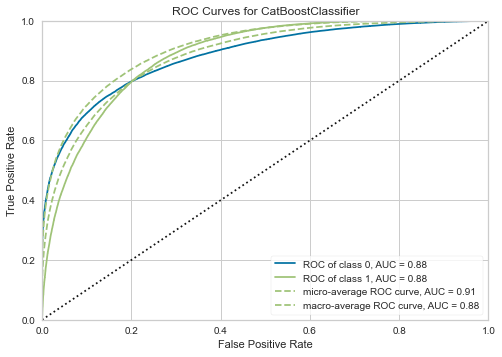

In [95]:
plot_model(catboost, plot = 'auc')

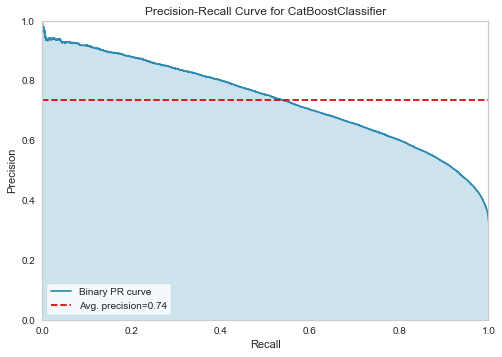

In [96]:
plot_model(catboost, plot = 'pr')

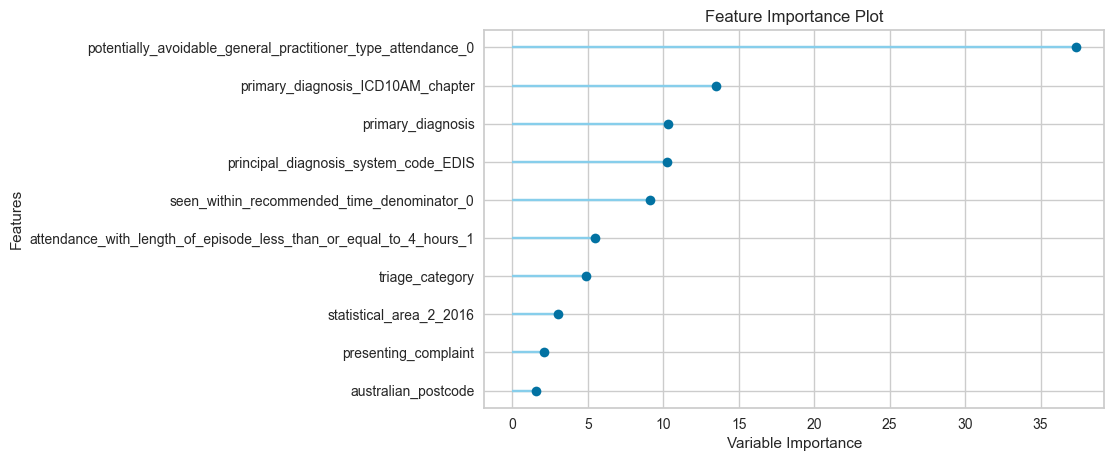

In [97]:
plot_model(catboost, plot='feature')

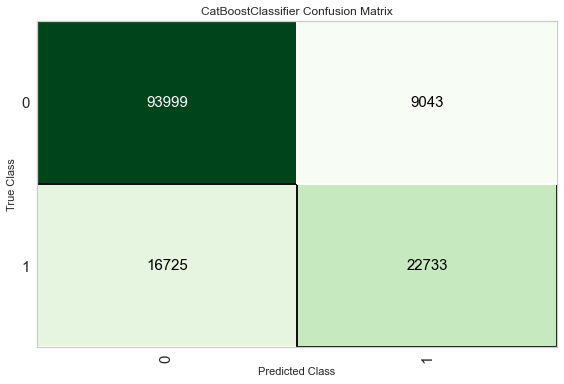

In [100]:
plot_model(catboost, plot = 'confusion_matrix')
#https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
#True Positive:
#Interpretation: You predicted positive and it’s true.
#You predicted that a woman is pregnant and she actually is.
#True Negative:
#Interpretation: You predicted negative and it’s true.
#You predicted that a man is not pregnant and he actually is not.
#False Positive: (Type 1 Error)
#Interpretation: You predicted positive and it’s false.
#You predicted that a man is pregnant but he actually is not.
#False Negative: (Type 2 Error)
#Interpretation: You predicted negative and it’s false.
#You predicted that a woman is not pregnant but she actually is.

In [101]:
evaluate_model(catboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [102]:
predict_model(catboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8192,0.8845,0.5761,0.7154,0.6383,0.5196,0.5250


,triage_category,primary_diagnosis,presenting_complaint,statistical_area_2_2016,primary_diagnosis_ICD10AM_chapter,principal_diagnosis_system_code_EDIS,australian_postcode,attendance_with_length_of_episode_less_than_or_equal_to_4_hours_1,mental_health_attendance_with_length_of_episode_less_than_or_equal_to_4_hours_0,mental_health_attendance_with_length_of_episode_less_than_or_equal_to_4_hours_denominator_0,...,affected_by_drugs_only_0,affected_by_drugs_and_or_alcohol_0,likely_meth_related_attendance_0,self_harm_attendance_0,suicide_attempt_or_at_risk_of_suicide_0,mental_health_consult_1.0,emergency_department_information_system_covid19_flag_0,admission,Label,Score
0,4.0,2.098863,3.180082,0.002928,0.693818,2.422041,0.388712,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,0,0.5648
1,2.0,-0.656562,-0.553180,-0.057695,-0.981683,-0.557797,-0.389521,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0.8626
2,2.0,-0.213293,-0.028511,0.018197,1.353779,-0.066492,0.636371,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0.9664
3,3.0,1.356377,-0.744317,-5.878089,-0.548884,1.624296,-1.180613,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0.9889
4,4.0,0.001895,2.030127,0.017743,-0.709331,0.083264,1.948946,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0.7626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142495,4.0,2.098863,2.030127,-0.012493,0.693818,2.422041,-0.736954,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0.5470
142496,4.0,-0.388689,-0.003444,-0.027459,0.693818,-0.399204,-0.760013,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1,1,0.7298
142497,2.0,2.906706,-0.720990,7.485633,-0.837587,3.290006,-0.550267,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,1.0000
142498,2.0,-0.221740,-0.769036,0.002776,1.353779,-0.181377,-0.433421,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0,0,0.9702


In [103]:
final_catboost = finalize_model(catboost)

In [104]:
#Final catboost parameters for deployment
print(final_catboost)

In [105]:
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8182,0.8857,0.5858,0.7134,0.6433,0.5229,0.5275


,triage_category,primary_diagnosis,presenting_complaint,statistical_area_2_2016,primary_diagnosis_ICD10AM_chapter,principal_diagnosis_system_code_EDIS,australian_postcode,attendance_length_of_episode,attendance,attendance_with_length_of_episode_less_than_or_equal_to_4_hours,...,affected_by_alcohol_only,affected_by_drugs_only,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,emergency_department_information_system_covid19_flag,Label,Score
0,2,NaN,CC000,505011080,Missing,NaN,6027,NaN,0,0,...,0,0,0,0,0,0,NaN,0,0,0.9996
1,4,M25.53,JUQ00,502011028,(M00-M99) Diseases of the musculoskeletal syst...,D01766,6210,89.0,1,1,...,0,0,0,0,0,0,NaN,0,0,0.9148
2,3,J05.0,C0000,505021097,(J00-J99) Diseases of respiratory system,D01208,6060,NaN,0,0,...,0,0,0,0,0,0,NaN,0,0,0.9905
3,3,NaN,TP000,506031124,Missing,NaN,6102,NaN,0,0,...,0,0,0,0,0,1,NaN,0,0,0.9999
4,2,R10.1,QAH00,507051191,"(R00-R99) Symptoms, signs and abnormal clinica...",D02184,6175,NaN,0,0,...,0,0,0,0,0,0,NaN,0,0,0.9670


In [106]:
unseen_predictions[["admission","Label"]].head(50)

,admission,Label
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [107]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['admission'], unseen_predictions['Label'], metric = 'Accuracy')

0.8182

In [108]:
save_model(final_catboost, 'catboost_admission_01_07_2022')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['attendance_length_of_episode',
                                                        'mental_health_admission'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='admission',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_val...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='admission')),
                 ('fix_perfect', Remove_100(target='admission')),
                 ('clean_names', Clean_Co

In [109]:
new_dataset = pd.read_csv('/users/he145100/OneDrive - WA Health/Test Data/emergency_arrivals_powerbi_test_10k.csv', dtype={
                                                                               'standard_australian_classification_of_countries_2011_for_country_of_birth':'str',
  'ambulance_number':'str'})

In [110]:
from pycaret.classification import load_model
saved_catboost = load_model('/Users/he145100/catboost_admission_01_07_2022')
print(saved_catboost)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['attendance_length_of_episode',
                                                       'mental_health_admission'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='admission',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_val...
                ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='admission')),
                ('fix_perfect', Remove_100(target='admission')),
   

In [111]:
from pycaret.classification import *
new_prediction = predict_model(saved_catboost, data=new_dataset)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8446,0.9009,0.6017,0.7245,0.6574,0.5580,0.5621


In [112]:
new_prediction.head()

,sequence_number,establishment_code,sex,ethnicity,marital_status,interpreter_required,employment_status,occupation,triage_category,visit_type,...,affected_by_drugs_only,affected_by_drugs_and_or_alcohol,likely_meth_related_attendance,self_harm_attendance,suicide_attempt_or_at_risk_of_suicide,mental_health_consult,age,emergency_department_information_system_covid19_flag,Label,Score
0,1101239629,105,1,4,5,2,7.0,NaN,2,1,...,0,0,0,0,0,NaN,64,0,0,0.9994
1,1101239628,208,2,4,1,2,7.0,NaN,2,1,...,0,0,0,0,0,NaN,57,0,0,0.9997
2,1101239627,101,1,4,5,2,3.0,NaN,2,1,...,0,0,0,0,0,NaN,41,0,0,0.9996
3,1101239626,642,2,4,1,2,8.0,NaN,4,1,...,0,0,0,0,0,NaN,18,0,0,0.9999
4,1101239625,277,2,4,1,2,1.0,NaN,3,1,...,0,0,0,0,0,NaN,2,0,0,0.9474


In [113]:
from pycaret.utils import check_metric
check_metric(new_prediction['admission'], new_prediction['Label'], metric = 'Accuracy')

0.8446